In [ ]:
# libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt 

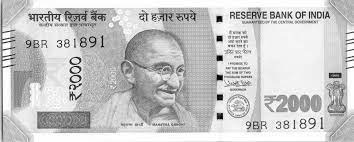

In [ ]:
# orginal image
img = cv2.imread('currency.jpg',0)
cv2_imshow(img) 

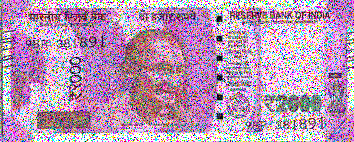

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('currency.jpg')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

cv2_imshow(noise)
cv2.waitKey(0)

# New Section

In [ ]:
import random
import cv2
 
def add_noise(img):
 
  
 import cv2
 from google.colab.patches import cv2_imshow
 import numpy as np

 img = cv2.imread('currency.jpg')

 gauss = np.random.normal(0,1,img.size)
 gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
 noise = img + img * gauss

         
 return noise
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('currency.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('noise.jpg',
            add_noise(img))    

True

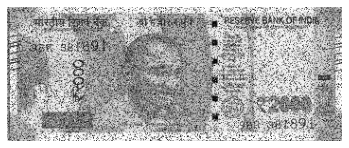

In [ ]:
f = cv2.imread('noise.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

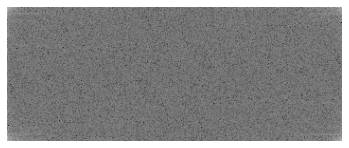

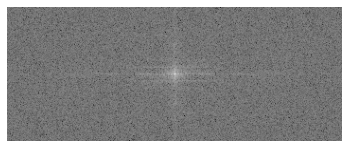

In [ ]:
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)), 
           cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

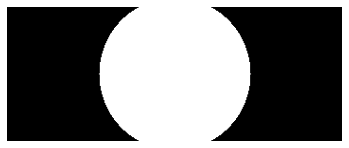

In [ ]:
# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

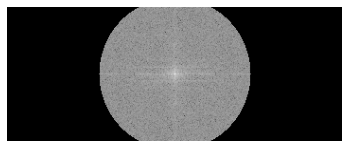

In [ ]:

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

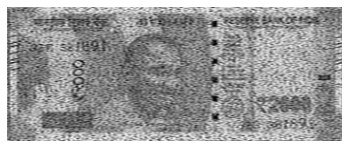

In [ ]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

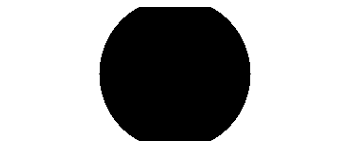

In [ ]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

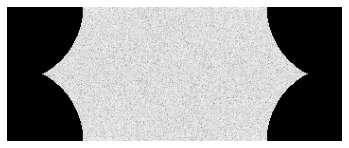

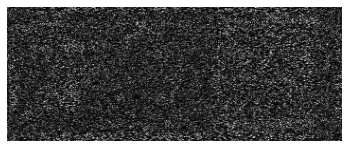

In [ ]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


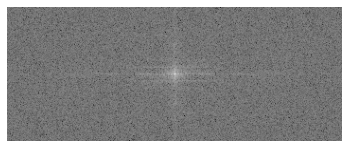

In [ ]:
# open the image
f = cv2.imread('noise.jpg',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

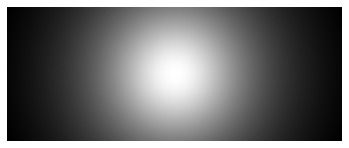

In [ ]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80 # cut of frequency
n = 2 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

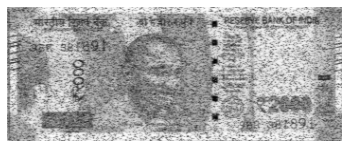

In [ ]:
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

<ipython-input-26-e0af56a4986d>:8: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1 + (D0/D)**n)


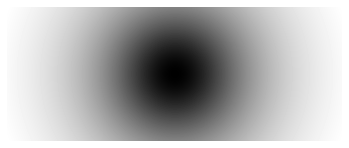

In [ ]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 80
n = 2
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)
        
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

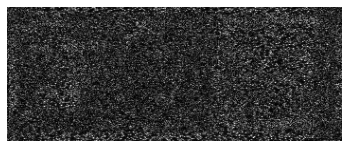

In [ ]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

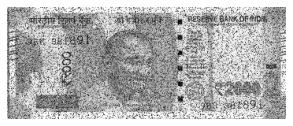

In [ ]:
# open the image f
f = cv2.imread('noise.jpg',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

<Figure size 360x360 with 0 Axes>

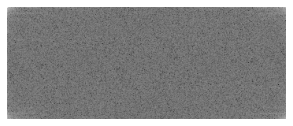

In [ ]:
# open the image f
f = cv2.imread('noise.jpg',0)

plt.figure(figsize=(5,5))

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:

# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

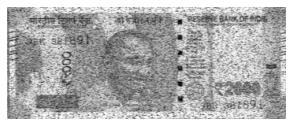

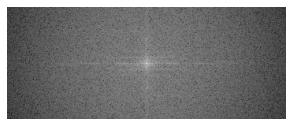

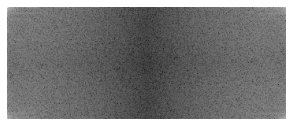

In [ ]:


# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:

# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

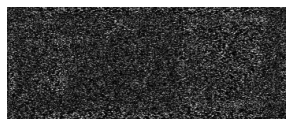

In [ ]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

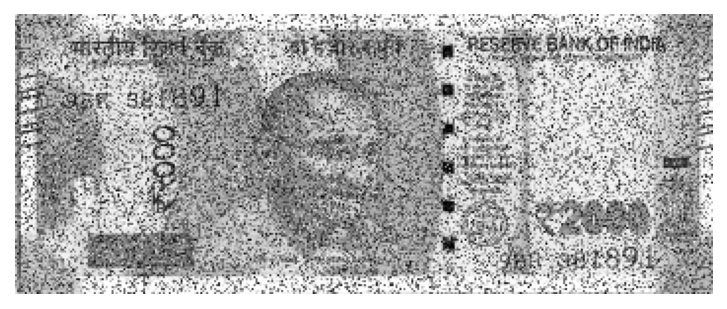

In [ ]:
# open and normalized the image
f = cv2.imread('noise.jpg',0)
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

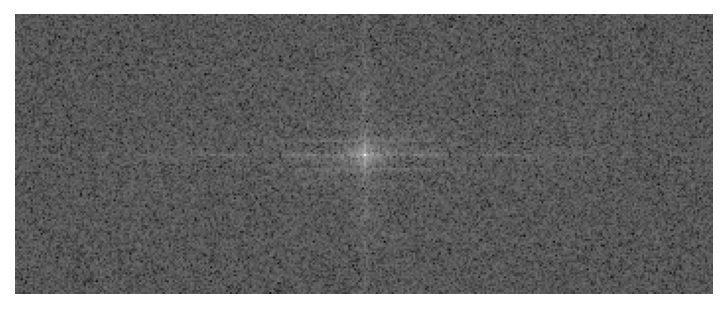

In [ ]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

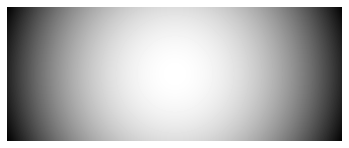

In [ ]:
# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

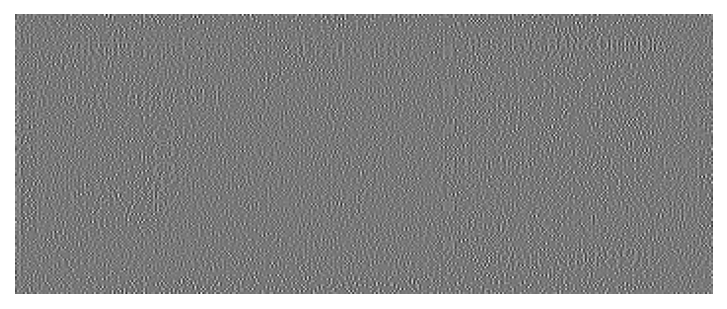

In [ ]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

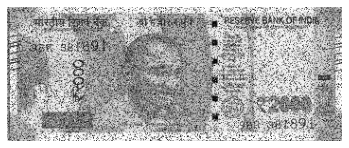

In [ ]:
f = cv2.imread('noise.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

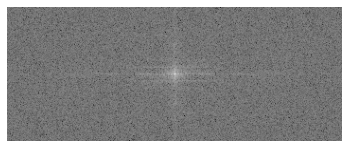

In [ ]:
# input image in frequency domain, F(u,v)
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Gaussian Low Pass Filter
M,N = F.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 100
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

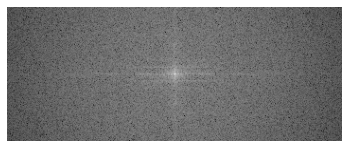

In [ ]:
# create fLP(x,y) (smoothed image)
FLP = H * F
plt.imshow(np.log1p(np.abs(FLP)), cmap='gray')
plt.axis('off')
plt.show()
FLP = np.fft.ifftshift(FLP)
fLP = np.abs(np.fft.ifft2(FLP))

plt.imshow(fLP, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# create mask g(x,y)
gMask = f - fLP

plt.imshow(gMask, cmap='gray')
plt.axis('off')
plt.show()

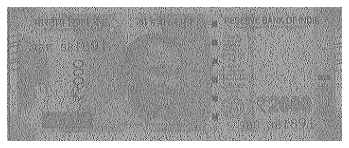

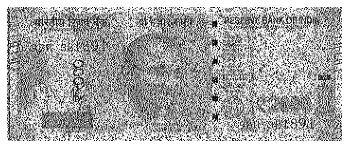

In [ ]:
# unsharp masking
k = 5
g = f + k*gMask

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Unsharp Masking in Frequency Domain
G = (1 + k*(1-H))*F
g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

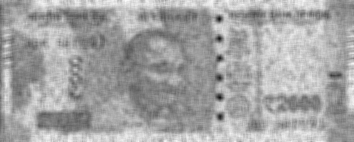

In [ ]:
s = cv2.imread('noise.jpg',0)
#denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(s, (m,n))
cv2_imshow(denoise_mean)


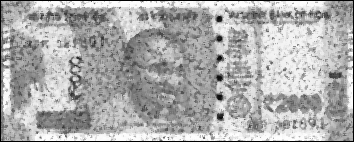

In [ ]:
# Read the image
img_noisy1 = cv2.imread('noise.jpg', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

median = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)

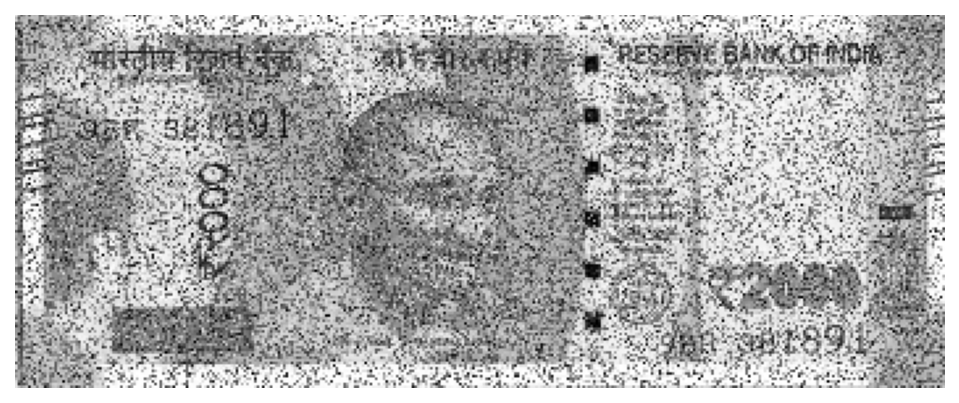

In [ ]:
img = cv2.imread('noise.jpg', 0)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

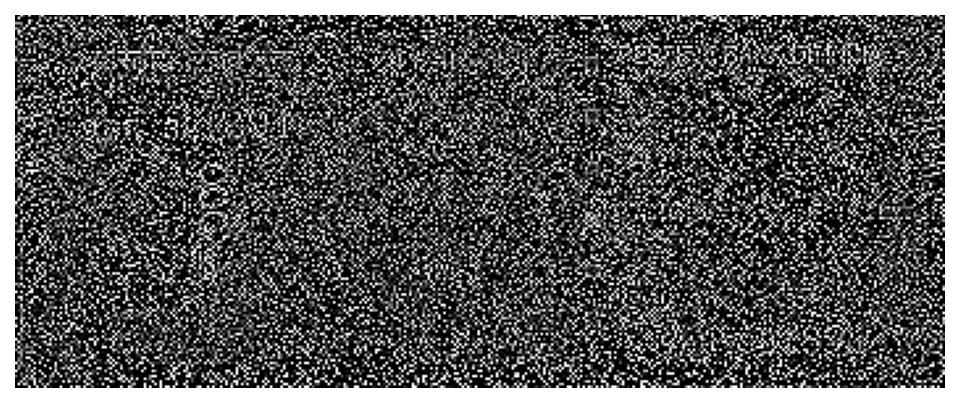

In [ ]:
# kernel 1
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

LaplacianImage = cv2.filter2D(src=img, 
                              ddepth=-1, 
                              kernel=kernel)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(LaplacianImage, cmap='gray')
plt.axis('off')
plt.show()

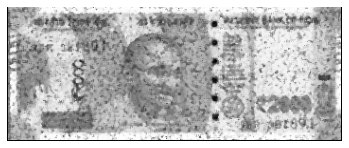

In [ ]:
f = cv2.imread('new_median_filtered.png', 0)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()